In [72]:
import pandas as pd

In [73]:
df = pd.read_csv('WELFake_Dataset.csv')

In [74]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [75]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [76]:
df['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

In [77]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [79]:
df.isna().sum() #NaN Values

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [80]:
df.dropna(inplace=True) # Dropping rows with NaN values

In [81]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [82]:
df.drop(["Unnamed: 0"], axis=1, inplace=True) #Removing Unwanted Columns

In [83]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [84]:
# Doing Some Feature Engineering
# Appending the title and Text and also counting the length as well
df["title_text"] = df["title"] + " " + df["text"]
df["body_len"] = df["title_text"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342


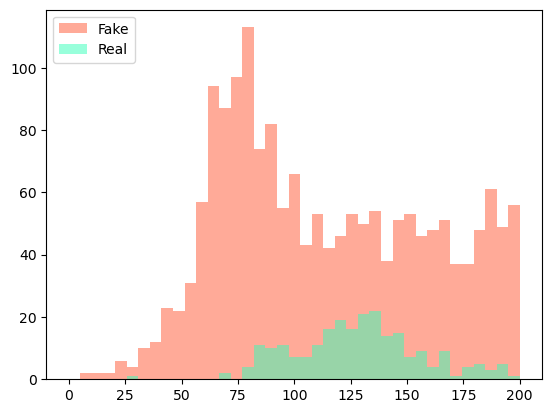

In [85]:
import numpy as np
from matplotlib.pylab import plt

bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(df[df["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

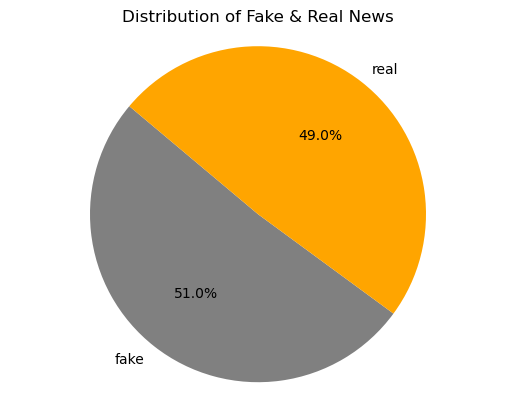

In [126]:
import matplotlib.pyplot as plt

class_names = ['fake', 'real'] 
label_count = df.label.value_counts()
colors = ['grey', 'orange']  # Custom colors for fake and real news
plt.pie(label_count, labels=class_names, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Fake & Real News')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [87]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [88]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [89]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/arif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
stop_words = set(stopwords.words('english'))

In [91]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

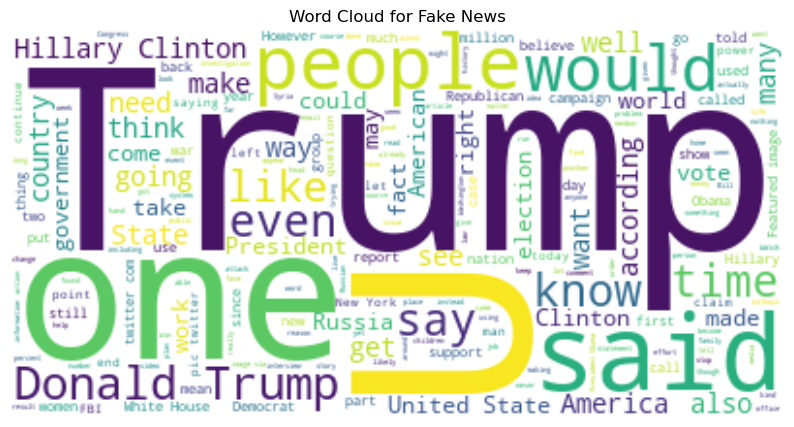

In [92]:
fake_news = df[df['label'] == 1]['text']
plot_wordcloud(' '.join(fake_news), 'Word Cloud for Fake News')


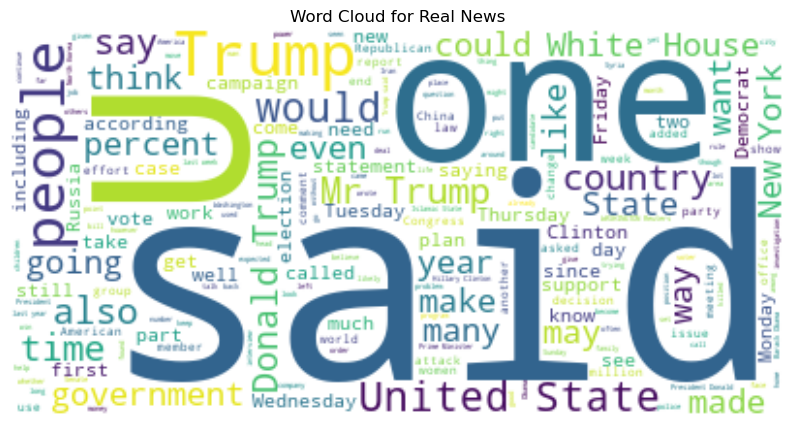

In [93]:
# Real news wordcloud
real_news = df[df['label'] == 0]['text']
plot_wordcloud(' '.join(real_news), 'Word Cloud for Real News')

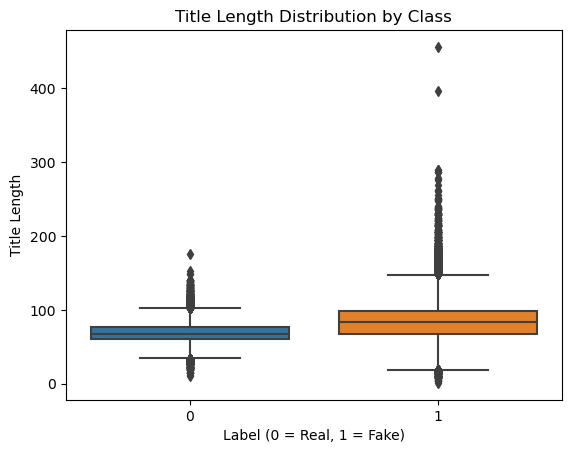

In [94]:
import seaborn as sns
# Title Length Distribution
df['title_length'] = df['title'].apply(len)
sns.boxplot(x='label', y='title_length', data=df)
plt.title('Title Length Distribution by Class')
plt.xlabel('Label (0 = Real, 1 = Fake)')
plt.ylabel('Title Length')
plt.show()

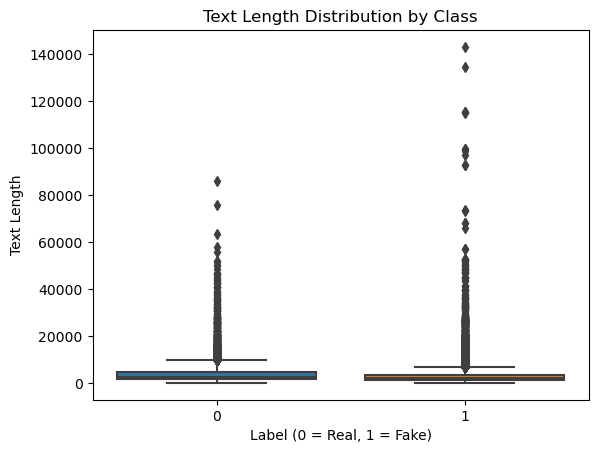

In [95]:
# Text Length Distribution
df['text_length'] = df['text'].apply(len)
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Length Distribution by Class')
plt.xlabel('Label (0 = Real, 1 = Fake)')
plt.ylabel('Text Length')
plt.show()

In [96]:
# Common Words Analysis
def plot_common_words(text, title):
    words = [word for word in text.split() if word.lower() not in stop_words]
    word_freq = Counter(words)
    common_words = word_freq.most_common(10)
    words, counts = zip(*common_words)
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()

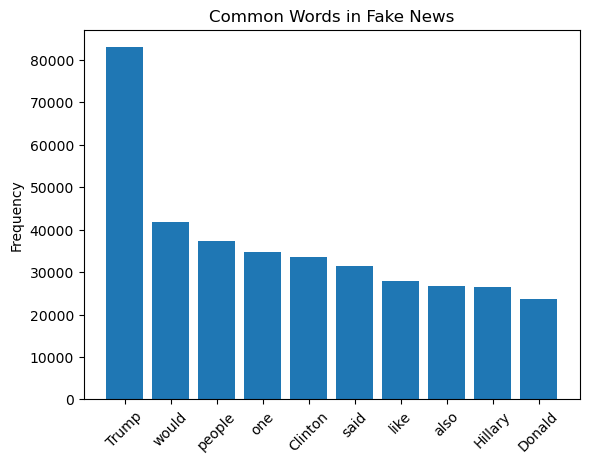

In [97]:
# Common words in fake news
plot_common_words(' '.join(fake_news), 'Common Words in Fake News')

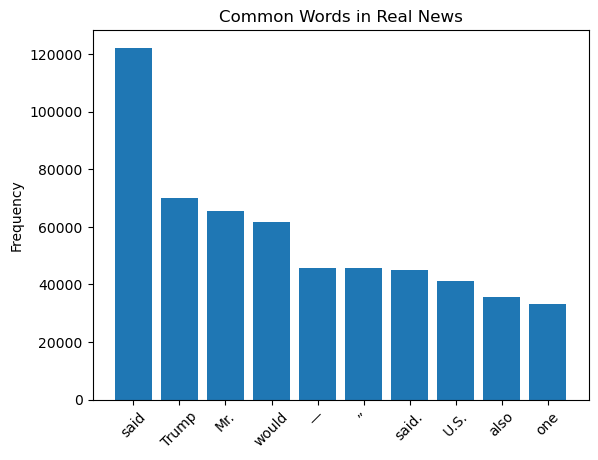

In [98]:
# Common words in real news
plot_common_words(' '.join(real_news), 'Common Words in Real News')

## Applying Naive Bayes

In [108]:
#Applying Naive Bayes 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

In [100]:
X = df['title_text']
y = df['label']

In [101]:
# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [102]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [103]:
# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [110]:
# Predict the labels on the test set
y_pred = nb.predict(X_test)
# Predict the probabilities on the test set
y_proba = nb.predict_proba(X_test)[:,1]

In [111]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'])

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', report)

Accuracy: 0.8495

Classification Report:
               precision    recall  f1-score   support

        Real       0.86      0.83      0.84      7081
        Fake       0.84      0.87      0.85      7227

    accuracy                           0.85     14308
   macro avg       0.85      0.85      0.85     14308
weighted avg       0.85      0.85      0.85     14308



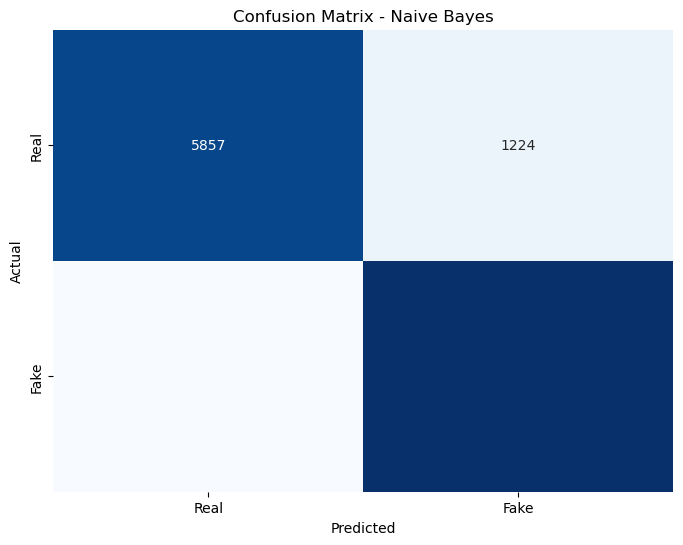

In [112]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

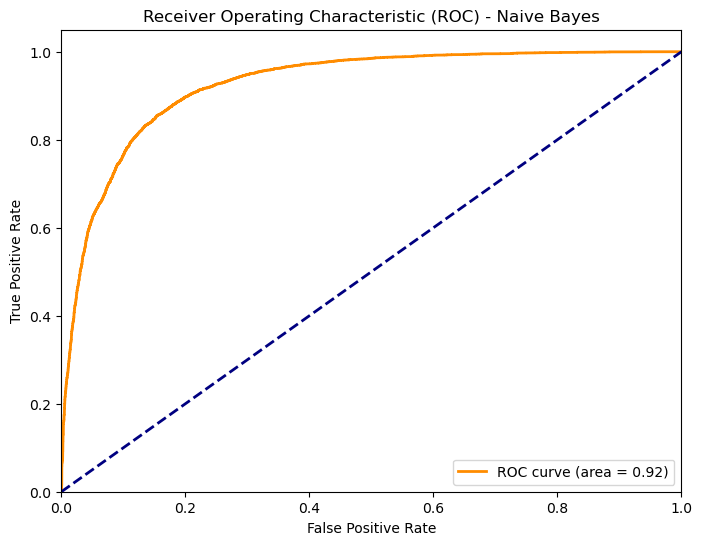

In [113]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## Applying Random Forest (Best Performance)

In [114]:
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [115]:
# Initialize the RandomForestClassifier with default parameters
rf = RandomForestClassifier(random_state=42)

In [116]:
# Train the Random Forest model
rf.fit(X_train, y_train)

# Predict the labels on the test set
y_pred_rf = rf.predict(X_test)
# Predict the probabilities on the test set
y_proba = rf.predict_proba(X_test)[:,1]

In [117]:
# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=['Real', 'Fake'])

In [118]:
# Output the results
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('\nRandom Forest Classification Report:\n', report_rf)

Random Forest Accuracy: 0.9516

Random Forest Classification Report:
               precision    recall  f1-score   support

        Real       0.96      0.94      0.95      7081
        Fake       0.94      0.97      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



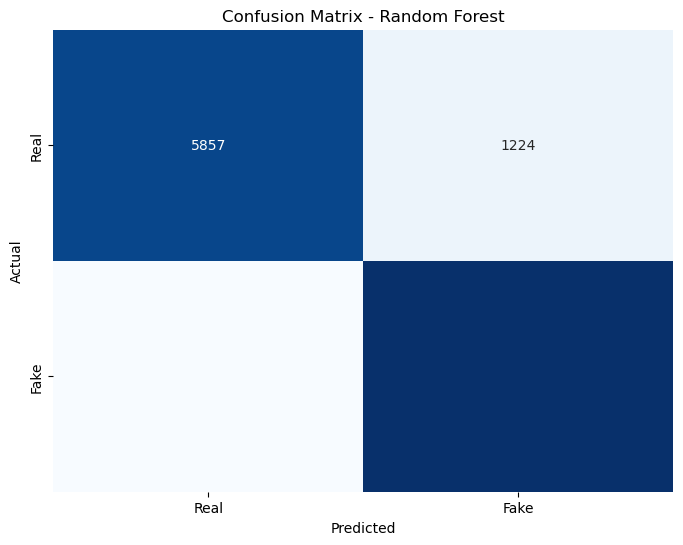

In [119]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

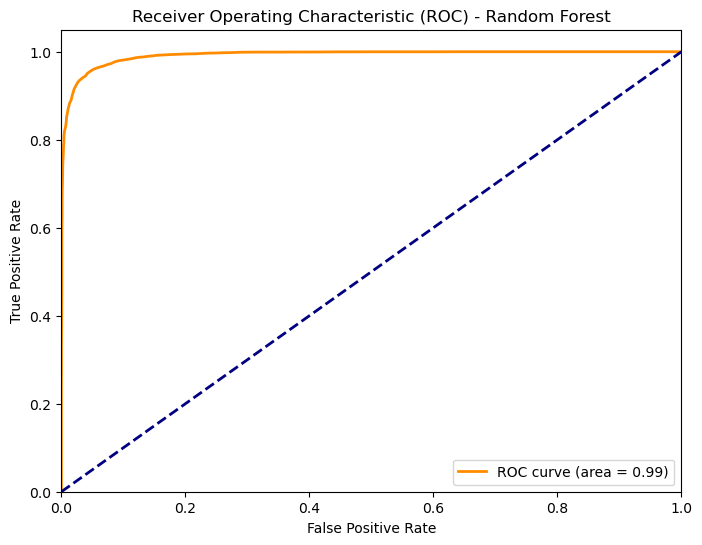

In [120]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Applying Gradient Boosting (Best Performance)

Test set score for Gradient Boosting: 0.9375174727425216
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      7081
           1       0.92      0.96      0.94      7227

    accuracy                           0.94     14308
   macro avg       0.94      0.94      0.94     14308
weighted avg       0.94      0.94      0.94     14308



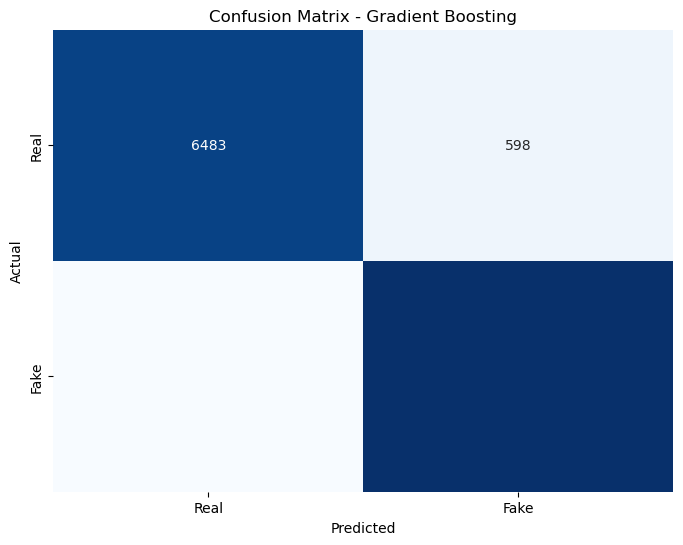

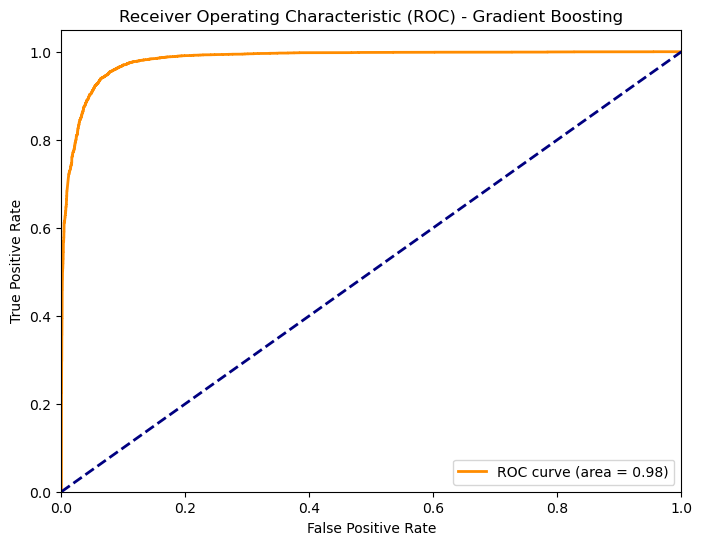

In [121]:
# Instantiate Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

# Fit the model
gb_model.fit(X_train, y_train)

# Evaluate on test set
test_accuracy_gb = gb_model.score(X_test, y_test)
print("Test set score for Gradient Boosting:", test_accuracy_gb)

# Generate classification report
y_pred_gb = gb_model.predict(X_test)
report_gb = classification_report(y_test, y_pred_gb)
print("Classification Report for Gradient Boosting:\n", report_gb)

# Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# ROC Curve
y_proba_gb = gb_model.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()